# Question 1

/var/folders/y2/lkm0p1s979jf_rsdx_9cgc0w0000gn/T/ipykernel_71845/3545924431.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1781 (6.96 KB)
Trainable params: 1781 (6.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.1931
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1157
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 6/100
8/8 [=============

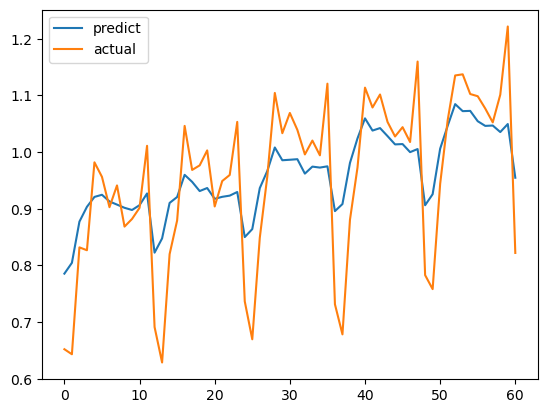

epoch : 100, time step : 12
Mean squared error: 0.0084


In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 랜덤 시드 설정
np.random.seed(42)
df = pd.read_csv('/Users/haseung-won/Desktop/학교/4-1/딥러닝/Cloud-Deep_learning_class/chap14/99B7E03359A4E9722E.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')

from pandas.tseries.offsets import MonthEnd

df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')

split_date = pd.Timestamp('01-01-2011')
# 2011/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.

train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]
# Feature는 Unadjusted 한 개


from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)


time_step=12
epoch=100

train_sc_df.head()
for s in range(1, time_step+1):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)


X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]


X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

X_train_t = X_train.reshape(X_train.shape[0], time_step, 1)
X_test_t = X_test.reshape(X_test.shape[0], time_step, 1)



from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()
model = Sequential() # Sequeatial Model
model.add(LSTM(20, input_shape=(time_step, 1))) # (timestep, feature)
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()



model.fit(X_train_t, y_train, epochs=epoch,
          batch_size=30, verbose=1)


y_pred = model.predict(X_test_t)

y_pred= model.predict(X_test_t)

plt.figure()
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predict', 'actual'])
plt.show()

from sklearn.metrics import mean_squared_error


print(f"epoch : {epoch}, time step : {time_step}")
print('Mean squared error: {0:.4f}'.format(mean_squared_error(y_test, y_pred))) 

In [13]:
#Mean squared error: 0.0104   100
#Mean squared error: 0.0018   200 


#Mean squared error: 0.0120 12
#Mean squared error: 0.0190 6 

# Qustation 2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1781 (6.96 KB)
Trainable params: 1781 (6.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
96/96 [==============================] - 1s 4ms/step - loss: 0.0401
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 6/100
96/96 [=

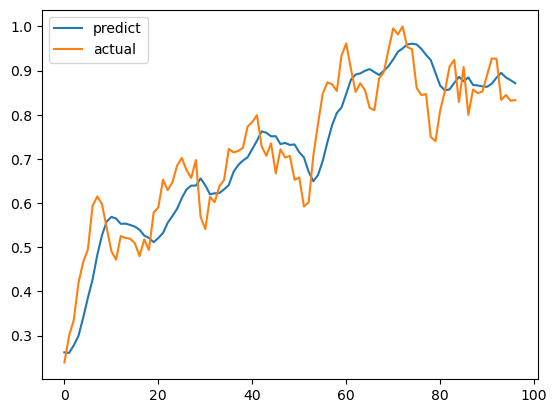

Mean squared error: 0.0052


In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/haseung-won/Desktop/학교/4-1/딥러닝/Cloud-Deep_learning_class/chap14/AABA_2006-01-01_to_2018-01-01.csv')

df['Date'] = pd.to_datetime(df['Date'])

split_date = pd.Timestamp('2017-06-30')
df = df.set_index('Date')
df = df[['Close']]

train = df.loc[:split_date, ['Close']]
test = df.loc[split_date:, ['Close']]
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.fit_transform(test)
train_sc_df = pd.DataFrame(train_sc, columns=['Close'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Close'], index=test.index)

time_step=30

train_sc_df.head()
for s in range(1, time_step+1):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Close'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Close'].shift(s)


X_train = train_sc_df.dropna().drop('Close', axis=1)
y_train = train_sc_df.dropna()[['Close']]

X_test = test_sc_df.dropna().drop('Close', axis=1)
y_test = test_sc_df.dropna()[['Close']]

X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values


X_train_t = X_train.reshape(X_train.shape[0], time_step, 1)
X_test_t = X_test.reshape(X_test.shape[0], time_step, 1)

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()
model = Sequential() # Sequeatial Model
model.add(LSTM(20, input_shape=(time_step, 1))) # (timestep, feature)
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()


model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1)


y_pred = model.predict(X_test_t)
plt.figure()
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predict', 'actual'])
plt.show()

from sklearn.metrics import mean_squared_error

print('Mean squared error: {0:.4f}'.format(mean_squared_error(y_test, y_pred))) 

# Question 3

Index(['Open', 'High', 'Low', 'Close'], dtype='object')
Open
High
Low
Close
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                2000      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
96/96 [==============================] - 1s 4ms/step - loss: 0.0061
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 5/100
96/96 [=====

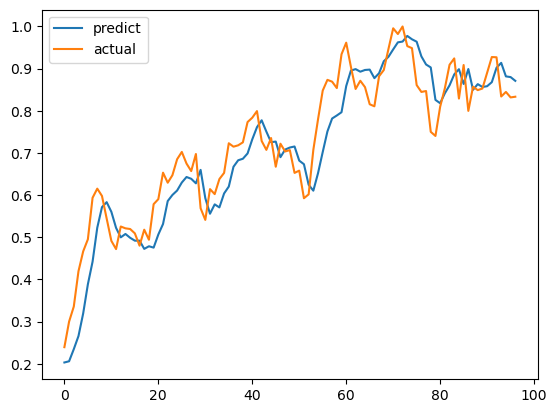

Mean squared error: 0.0047


In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/haseung-won/Desktop/학교/4-1/딥러닝/Cloud-Deep_learning_class/chap14/AABA_2006-01-01_to_2018-01-01.csv')

df['Date'] = pd.to_datetime(df['Date'])

split_date = pd.Timestamp('2017-06-30')
df = df.set_index('Date')

df=df.drop(['Volume','Name'],axis=1)
train = df.loc[:split_date]
test = df.loc[split_date:]

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.fit_transform(test)

time_step=30

df_list=[]

print(train.columns)

train_sc_df = pd.DataFrame(train_sc, columns=list(train.columns), index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=list(test.columns), index=test.index)
for i in train.columns:
    print(i)
    train_tmp_df = train_sc_df[[i]].copy()  # Use copy() to create a copy
    test_tmp_df = test_sc_df[[i]].copy()   # Use copy() to create a copy
    for s in range(1, time_step+1):
        train_tmp_df['shift_{}'.format(s)] = train_tmp_df[i].shift(s)
        test_tmp_df['shift_{}'.format(s)] = test_tmp_df[i].shift(s)

    df_list.append([train_tmp_df, test_tmp_df])

X_train_tensor=[]
y_train_tensor=[]

X_test_tensor=[]
y_test_tensor=[]


column_list=train.columns
for index,df_ in enumerate(df_list):

    temp_x = df_[0].dropna().drop(column_list[index], axis=1)
    X_train_tensor.append(temp_x.values)
    y_train_tensor.append(df_[0].dropna()[column_list[index]].values)


    temp_test_x = df_[1].dropna().drop(column_list[index], axis=1)
    X_test_tensor.append(temp_test_x.values)
    

    y_test_tensor.append(df_[1].dropna()[column_list[index]].values)
import tensorflow as tf
X_train_tensor_transposed = tf.transpose(X_train_tensor, perm=[1, 2, 0])
y_train_tensor_transposed = tf.transpose(y_train_tensor)
X_test_tensor_transposed = tf.transpose(X_test_tensor, perm=[1, 2, 0])
y_test_tensor_transposed = tf.transpose(y_test_tensor)

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()
model = Sequential() # Sequeatial Model
model.add(LSTM(20, input_shape=(time_step, 4))) # (timestep, feature)
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()


model.fit(X_train_tensor_transposed, y_train_tensor_transposed, epochs=100,
          batch_size=30, verbose=1)


y_pred = model.predict(X_test_tensor_transposed)
plt.figure()
plt.plot(y_pred)
plt.plot(y_test_tensor_transposed[:, 3])
plt.legend(['predict', 'actual'])
plt.show()

from sklearn.metrics import mean_squared_error

print('Mean squared error: {0:.4f}'.format(mean_squared_error(y_test_tensor_transposed[:, 3], y_pred))) 